# EDA

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

## UPLOAD DATASETS

In [27]:
path = '../../'

In [28]:
name_cat = 'cat_quality_results.pickle'
name_num = 'num_quality_results.pickle'

In [29]:
cat = pd.read_pickle(path + '/02_Data/03_Work/' + name_cat)
num = pd.read_pickle(path + '/02_Data/03_Work/' + name_num)

## EDA CATEGORICAL

### Statistical Analysis

No incluímos la variable 'd' ya que va a tener demasiados valores.

In [31]:
include = cat.columns.to_list()
del include[2]

In [32]:
def frec_cat(df_cat):
    results = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Value',0: "Frecuency"})\
                .sort_values(by = ['Variable','Frecuency'])
    return(results)

In [33]:
pd.set_option('display.max_rows', None)

frec_cat(cat[include])

,Variable,Value,Frecuency
41,event_name_1,Chanukah End,0.001880
42,event_name_1,Christmas,0.001880
43,event_name_1,Cinco De Mayo,0.001880
48,event_name_1,Father's day,0.001880
62,event_name_1,OrthodoxEaster,0.001880
44,event_name_1,ColumbusDay,0.002820
45,event_name_1,Easter,0.002820
46,event_name_1,Eid al-Fitr,0.002820
47,event_name_1,EidAlAdha,0.002820
49,event_name_1,Halloween,0.002820


In [35]:
pd.set_option('display.max_rows', 6)

### Visual Analysis

In [36]:
def plot_eda_categorical(cat):
    
    #number of rows
    from math import ceil
    rows = ceil(cat.shape[1] / 2)
    #plot
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))
    ax = ax.flat 
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

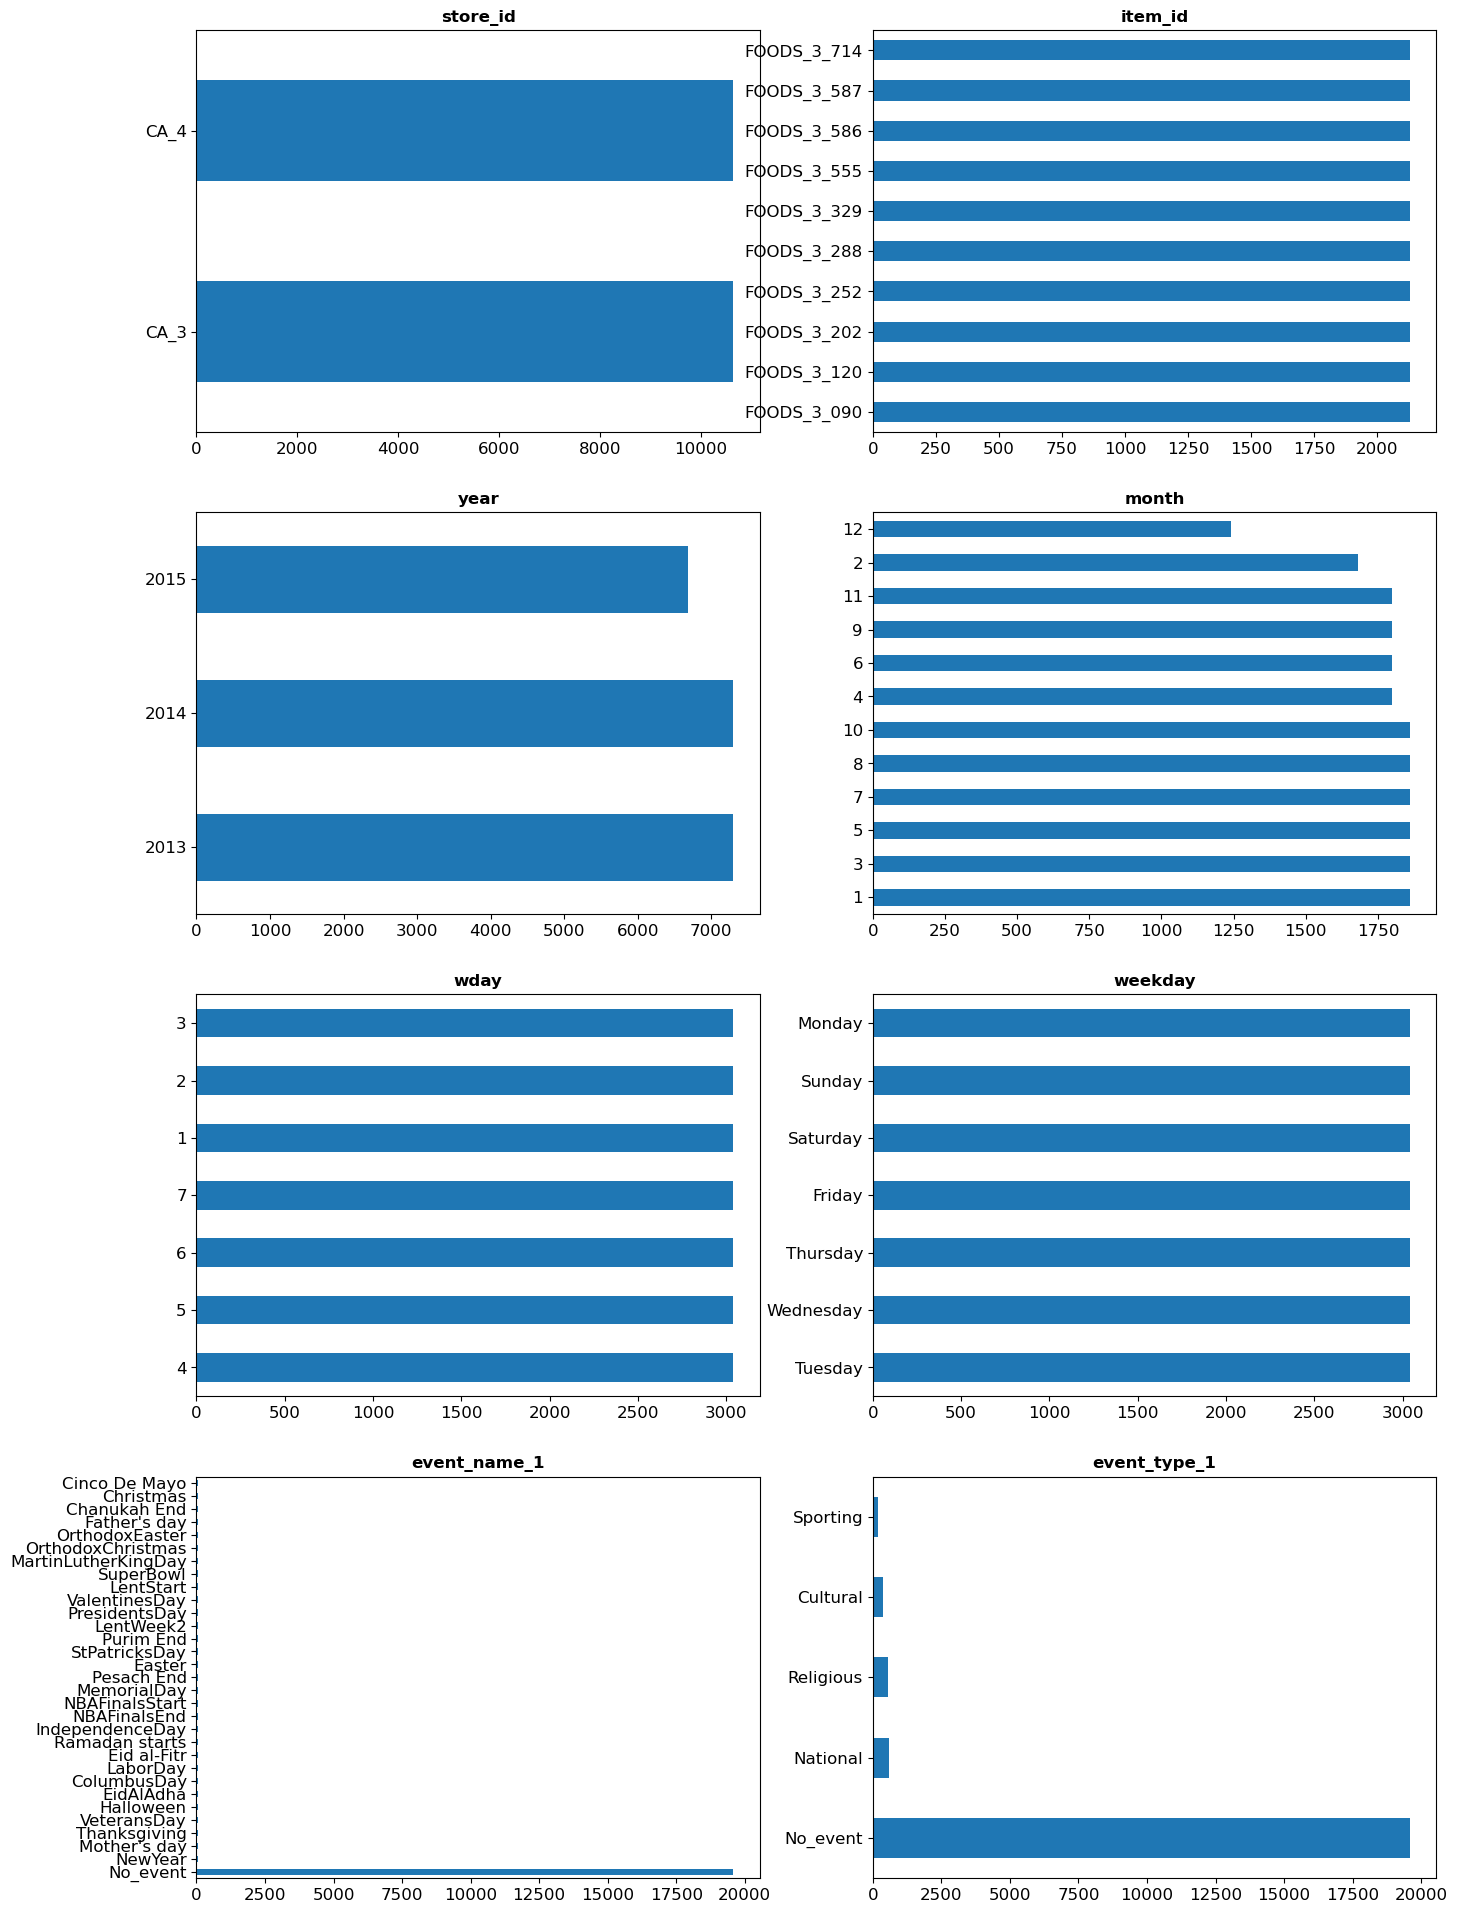

In [37]:
plot_eda_categorical(cat[include])

## EDA NUMERICAL

In [40]:
def estatistical_count(num):
    #describe
    stats = num.describe().T
    #Add Median
    stats['median'] = num.median()
    stats = stats.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return(stats)

In [41]:
estatistical_count(num)

,count,mean,median,std,min,25%,50%,75%,max
wm_yr_wk,21280.0,11415.022556,11420.00,82.874752,11249.0,11335.0,11420.00,11506.00,11544.00
sales,21280.0,28.874577,18.00,38.988147,0.0,6.0,18.00,37.00,763.00
sell_price,21280.0,2.394261,1.58,1.236042,1.0,1.5,1.58,2.98,4.98


### Visual Analysis

the graphical analysis that makes the most sense is that of sales and prices by different dimensions.

So first we need to rejoin the two dataframes.

In [42]:
df = pd.concat([cat,num], axis=1)

df.head()

,store_id,item_id,d,year,month,wday,weekday,event_name_1,event_type_1,wm_yr_wk,sales,sell_price
date,,,,,,,,,,,,
2013-01-01,CA_3,FOODS_3_090,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,1.25
2013-01-01,CA_3,FOODS_3_120,d_704,2013,1,4,Tuesday,NewYear,National,11249,33,1.25
2013-01-01,CA_3,FOODS_3_202,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,4.98
2013-01-01,CA_3,FOODS_3_252,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,4.98
2013-01-01,CA_3,FOODS_3_288,d_704,2013,1,4,Tuesday,NewYear,National,11249,20,4.28


#### Global sales trend

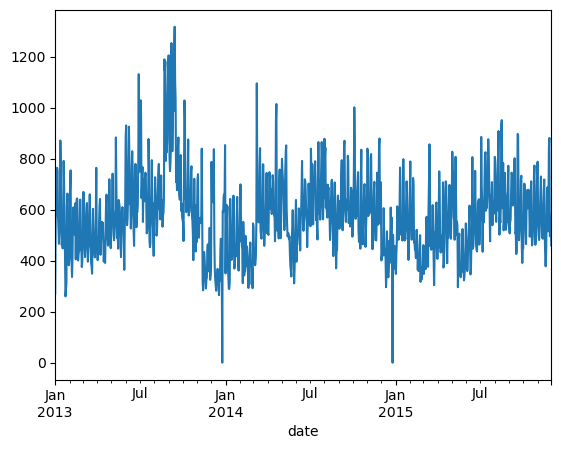

In [44]:
df.groupby('date').sales.sum().plot();

#### Sales trend by product

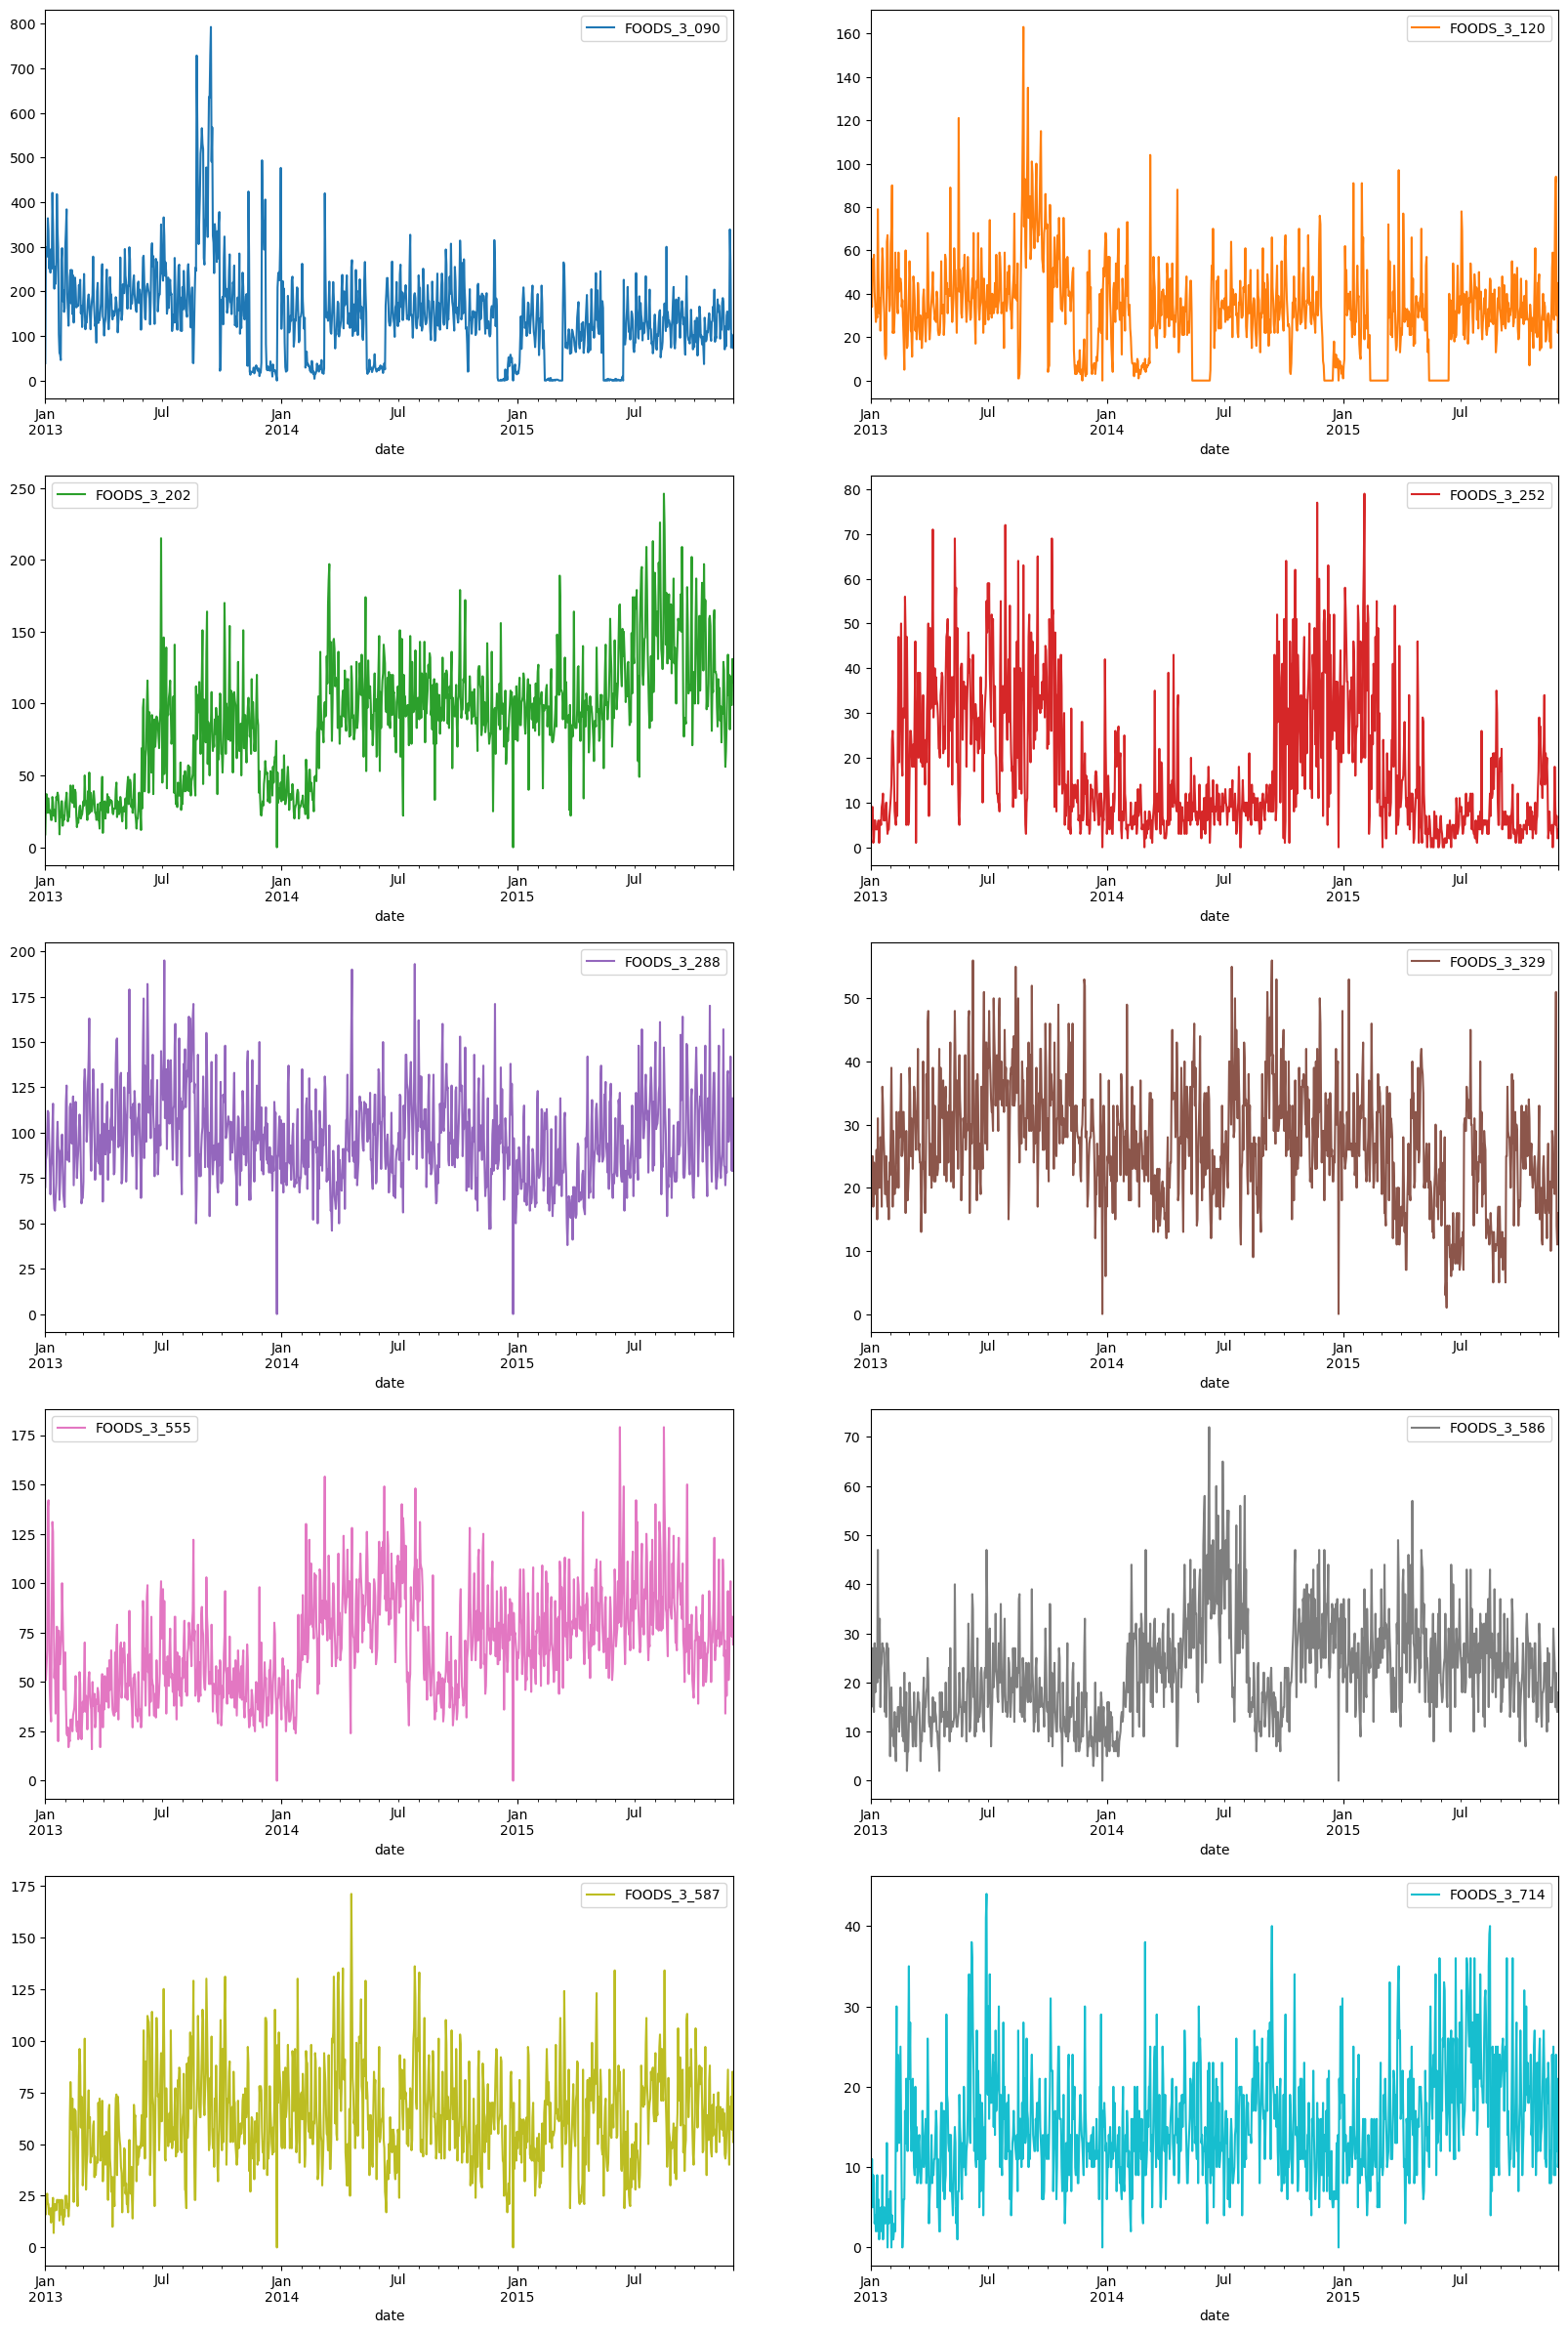

In [46]:
df.groupby(['date','item_id']).sales.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

#### Sales trend by store and product

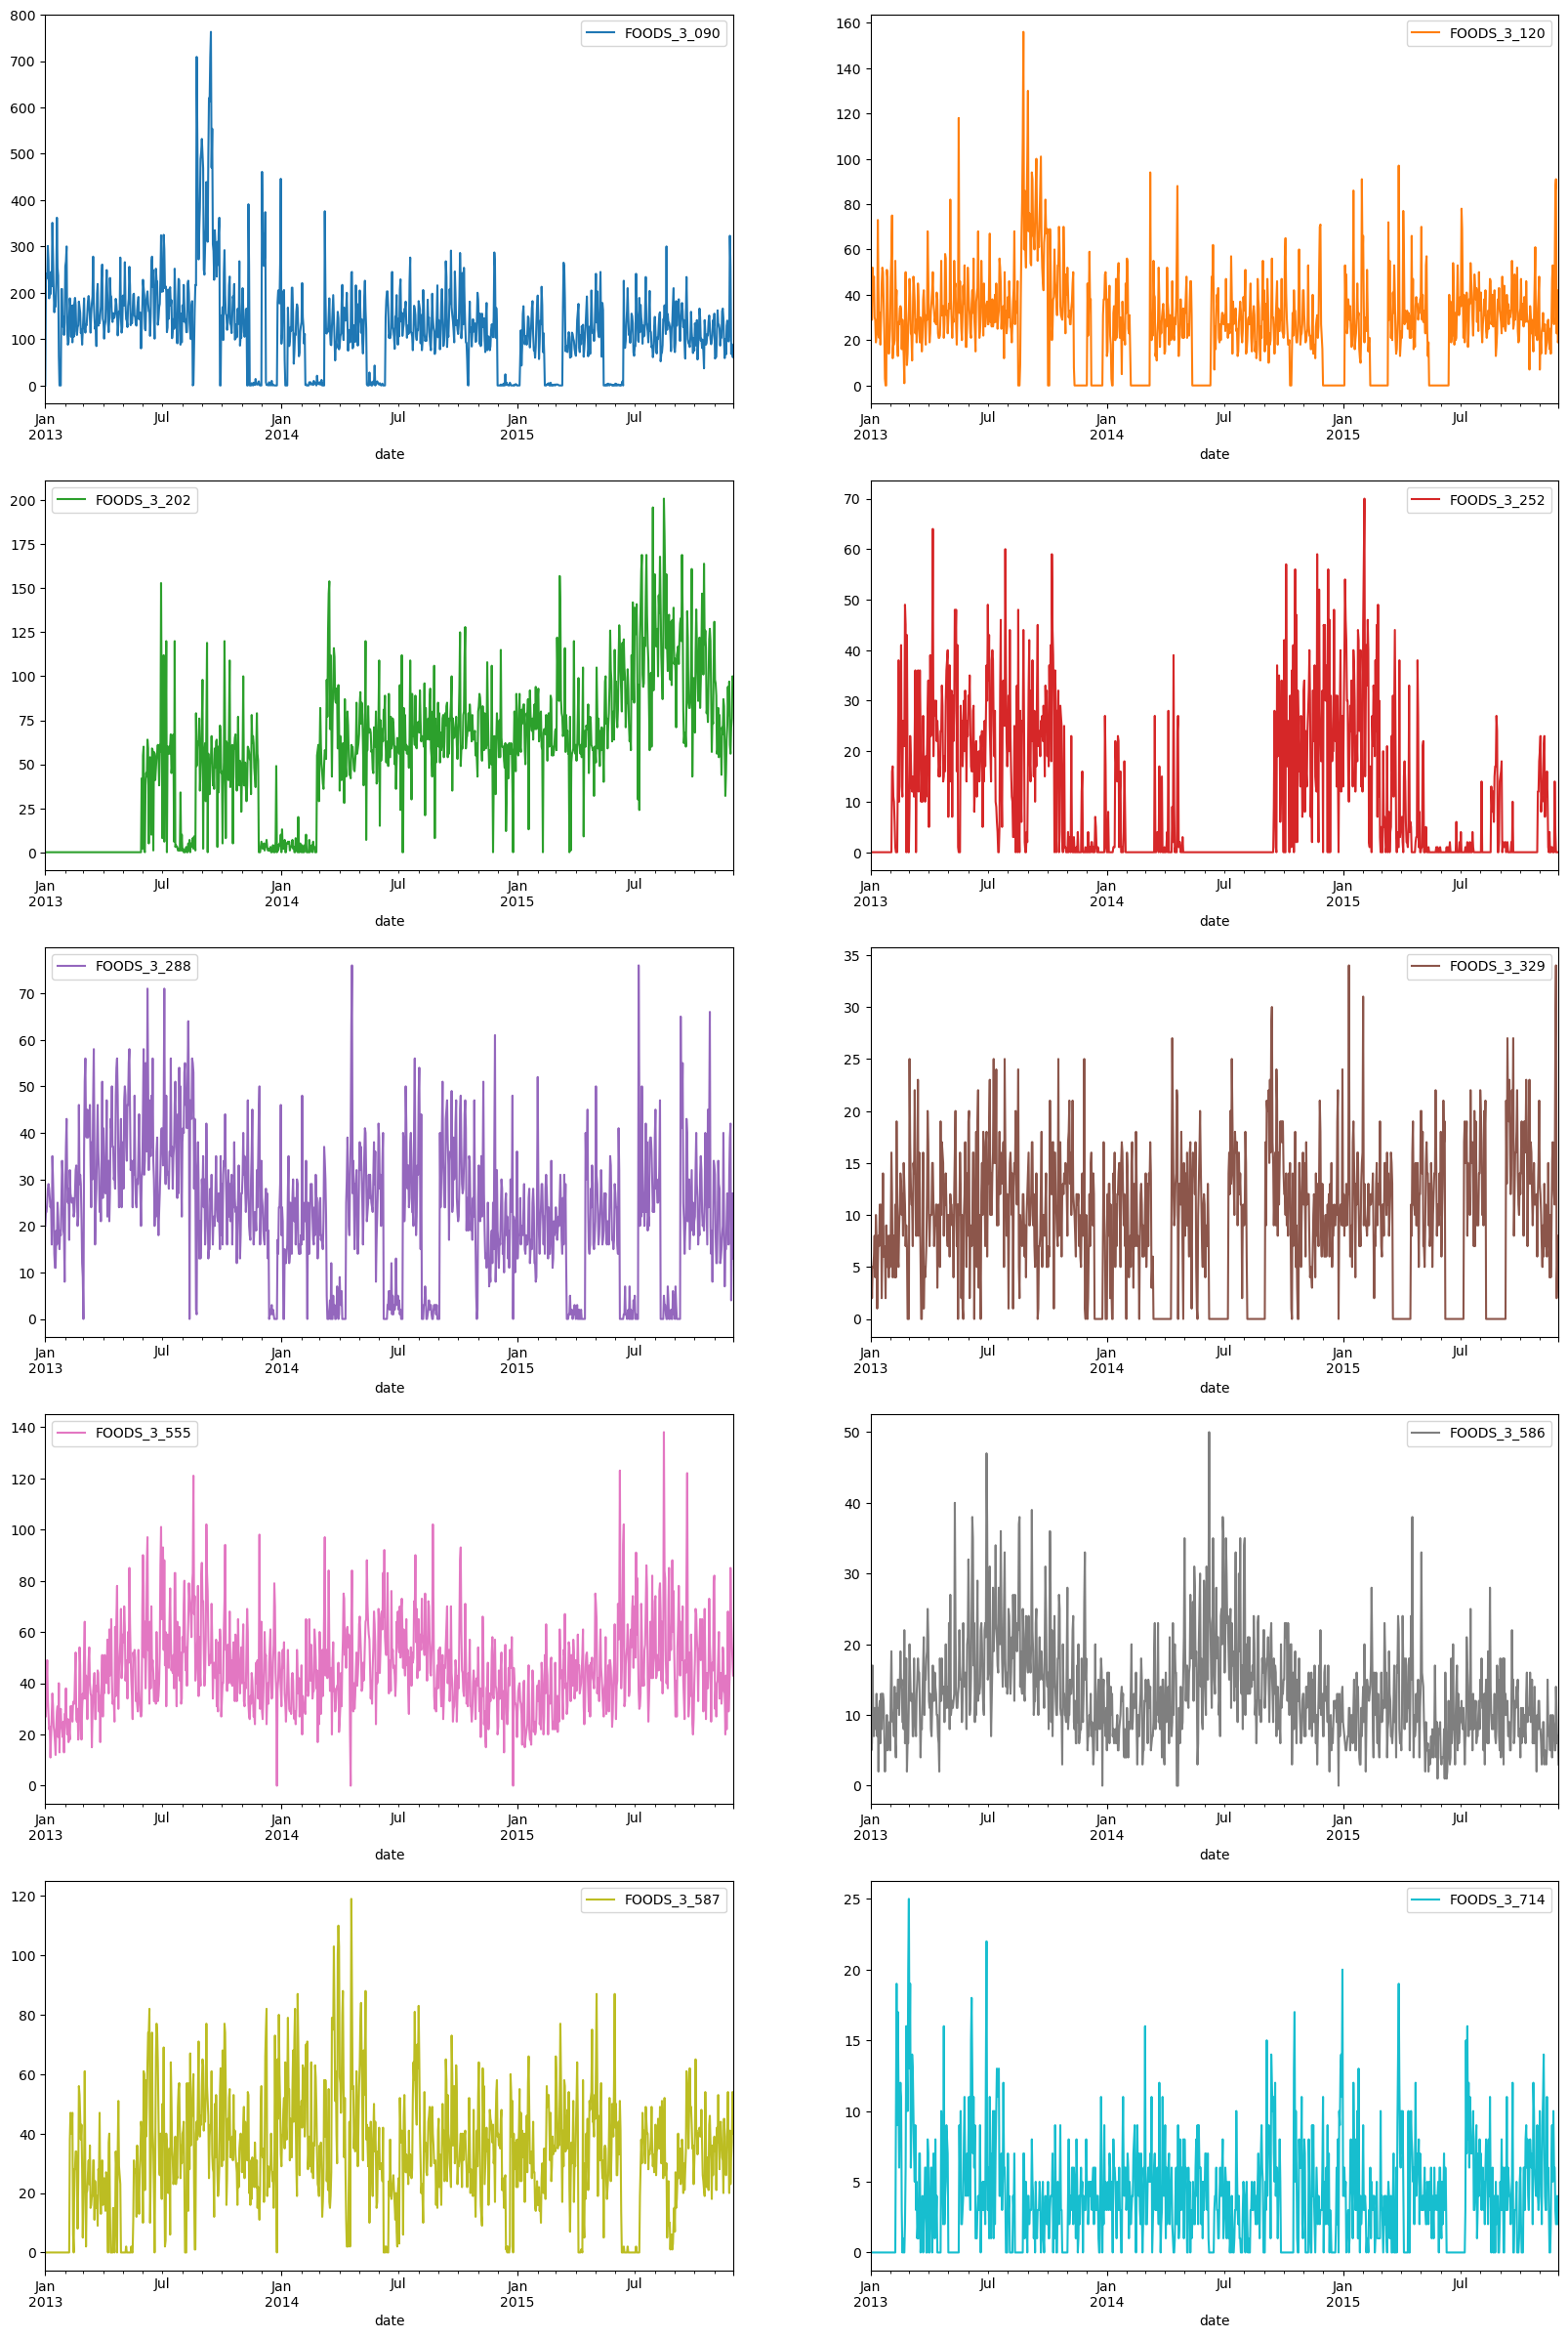

In [47]:
df.loc[df.store_id == 'CA_3'].groupby(['date','item_id']).sales.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

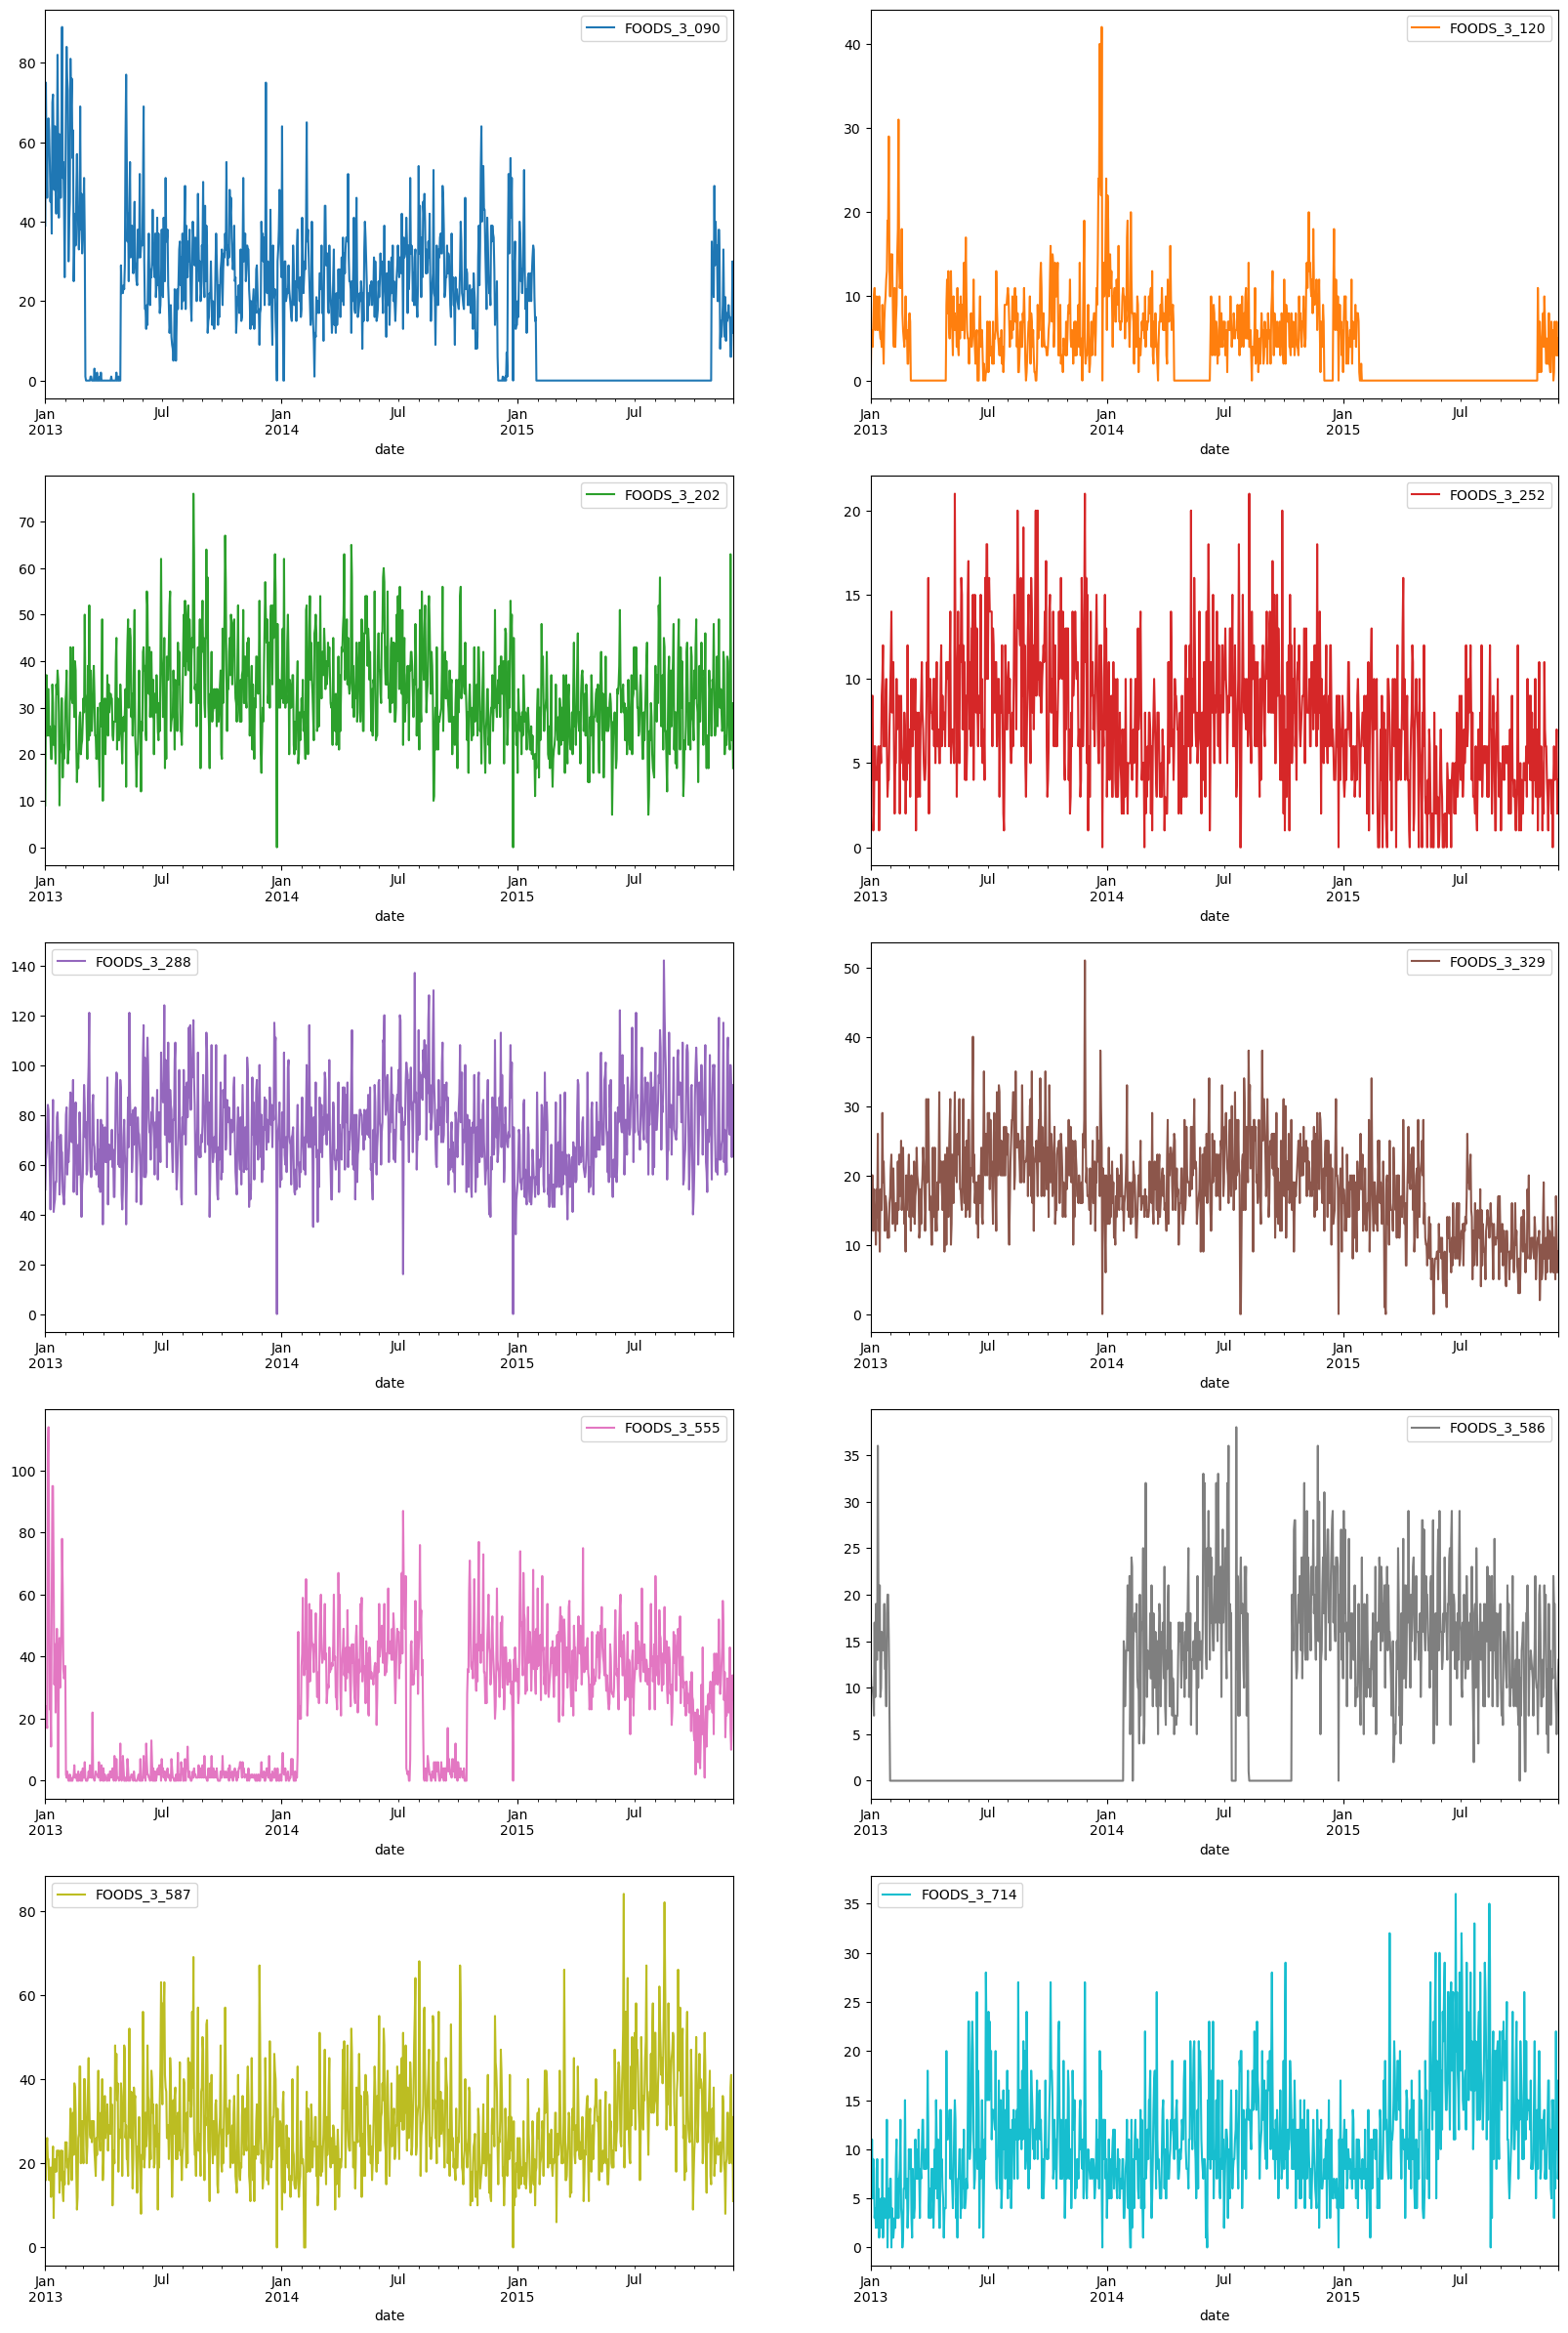

In [48]:
df.loc[df.store_id == 'CA_4'].groupby(['date','item_id']).sales.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

Conclusiones:

Conclusions:

* Hierarchical structure
* There are new products at the store level
* Although not at a general level, so we might think that they are not really new products if there is   not intermittent demand
*There is intermittent demand
* We do not know the cause: lack of demand, withdrawal from the market or out of stock

Actions:

* Model at product store level
* Create a variable that captures the effect of intermittent demand
* Use fast, tree-based algorithms: XGBoost or lightGBM

#### Price trend by product

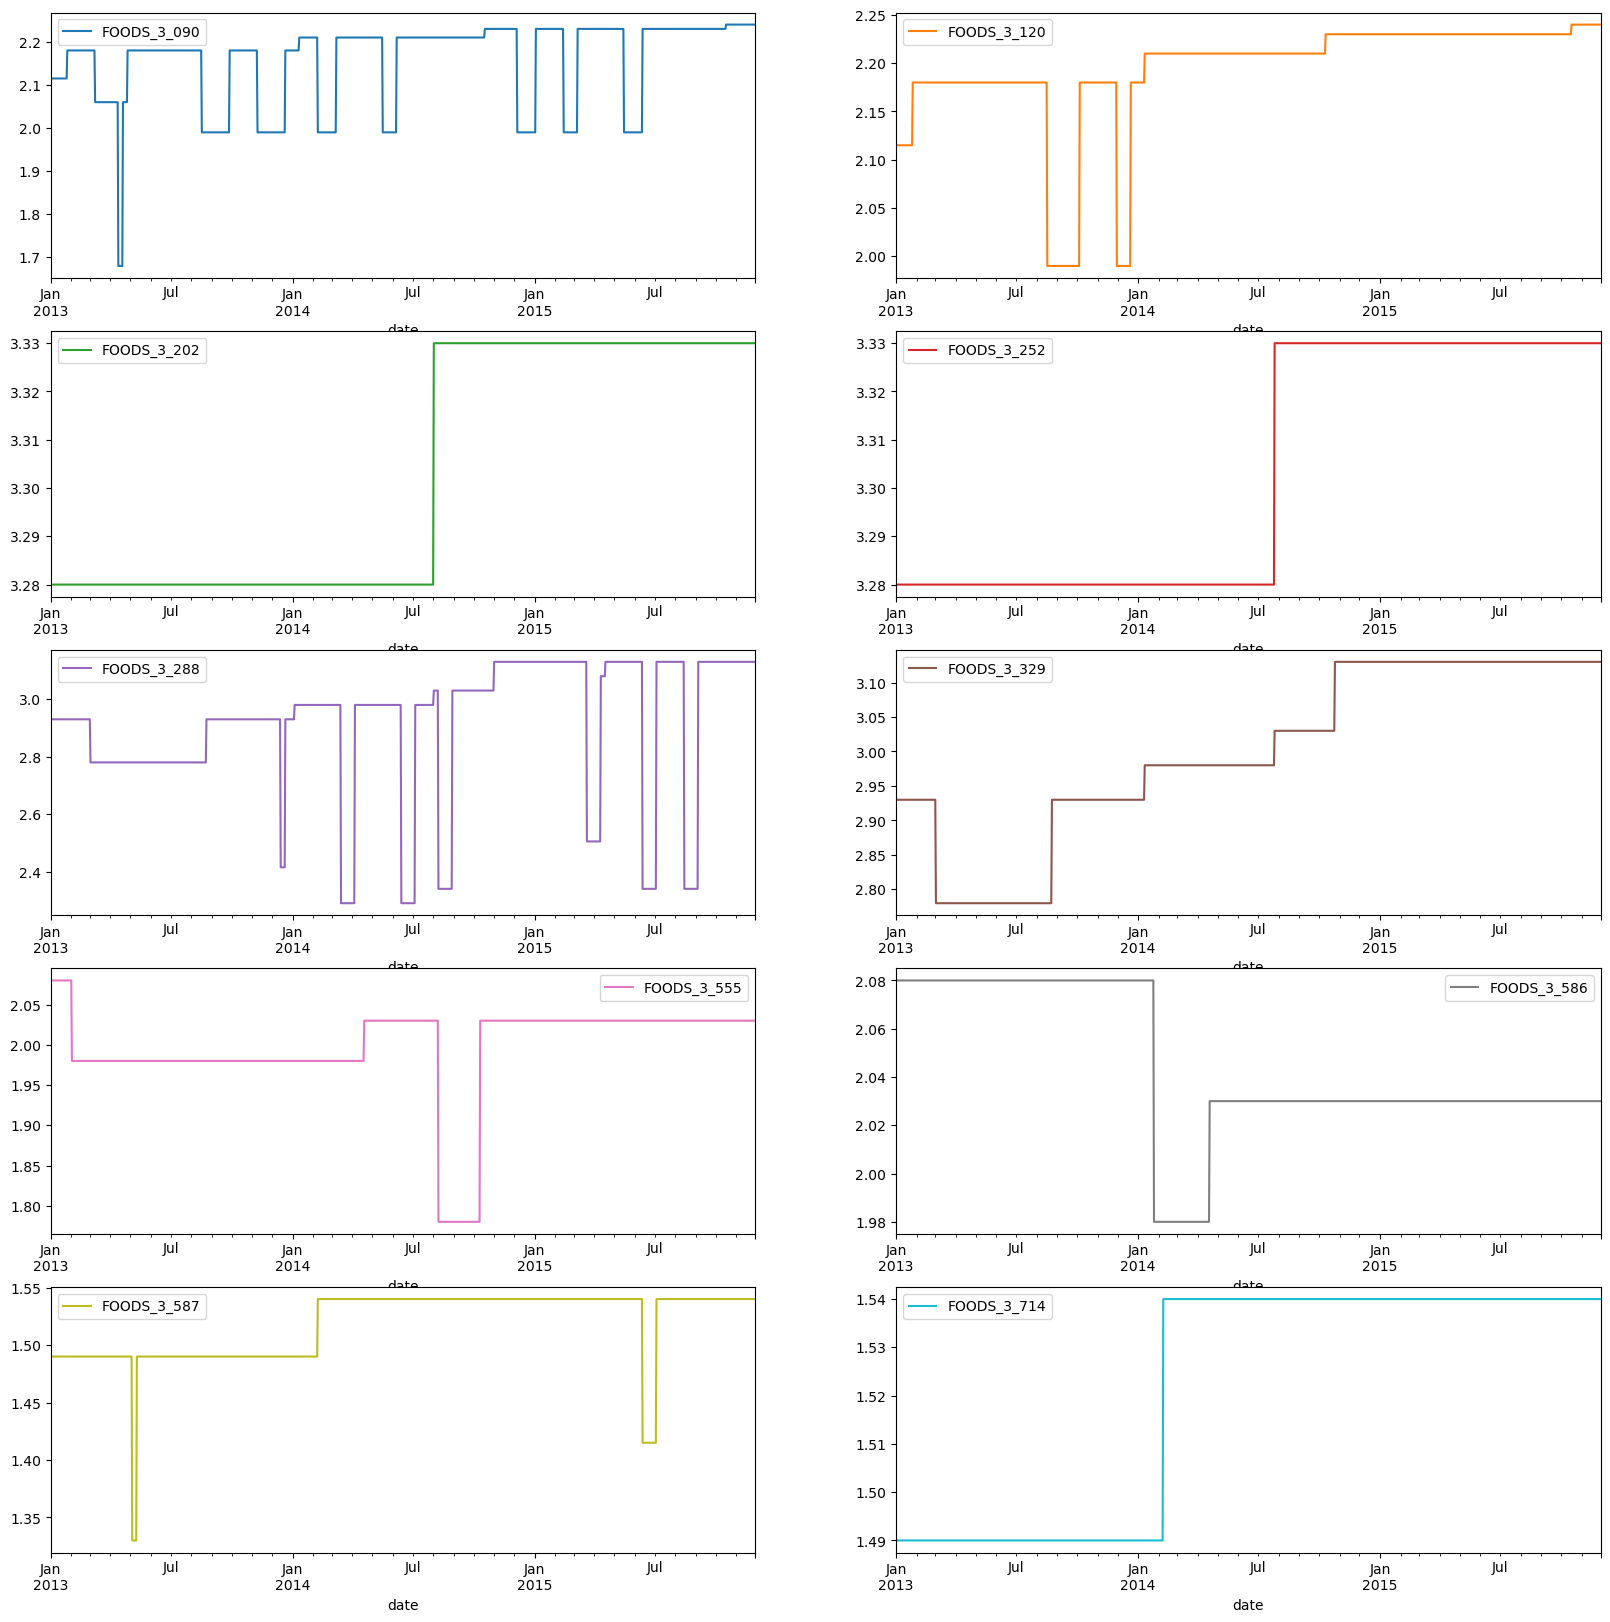

In [49]:
df.groupby(['date','item_id']).sell_price.mean().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,20));

Conclusions:

* Pricing policies vary greatly by product
* Seems like promotions are frequent
* It would be very useful to have a promotions calendar

#### Seasonality by product

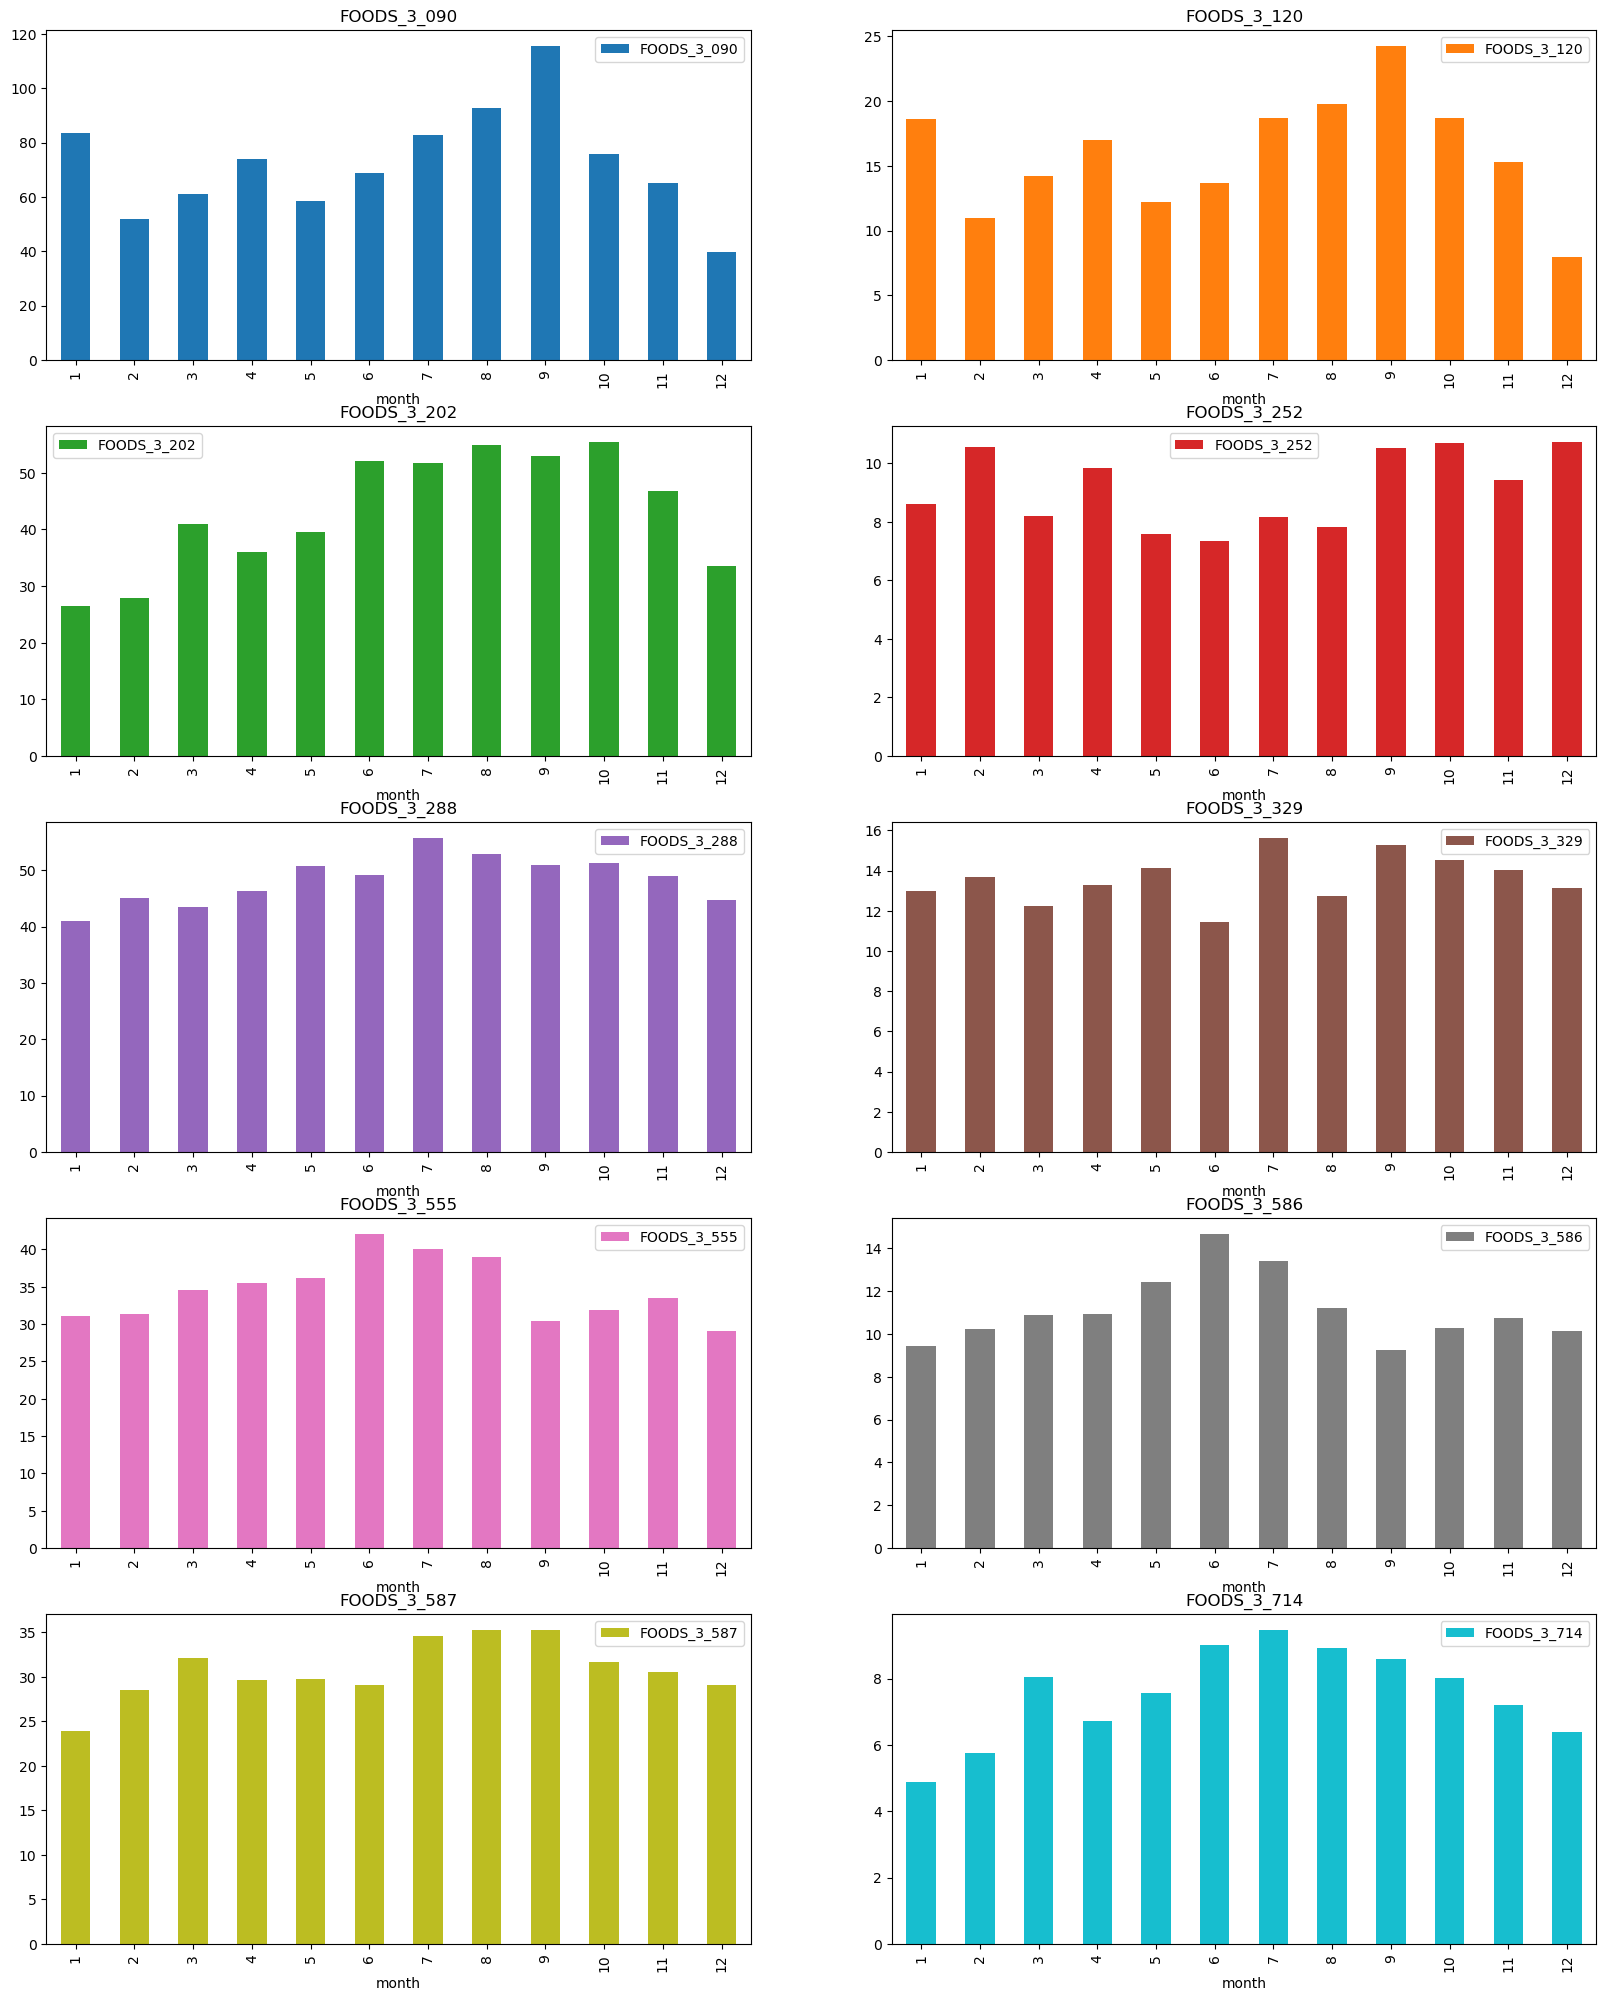

In [50]:
df.groupby(['month','item_id']).sales.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));

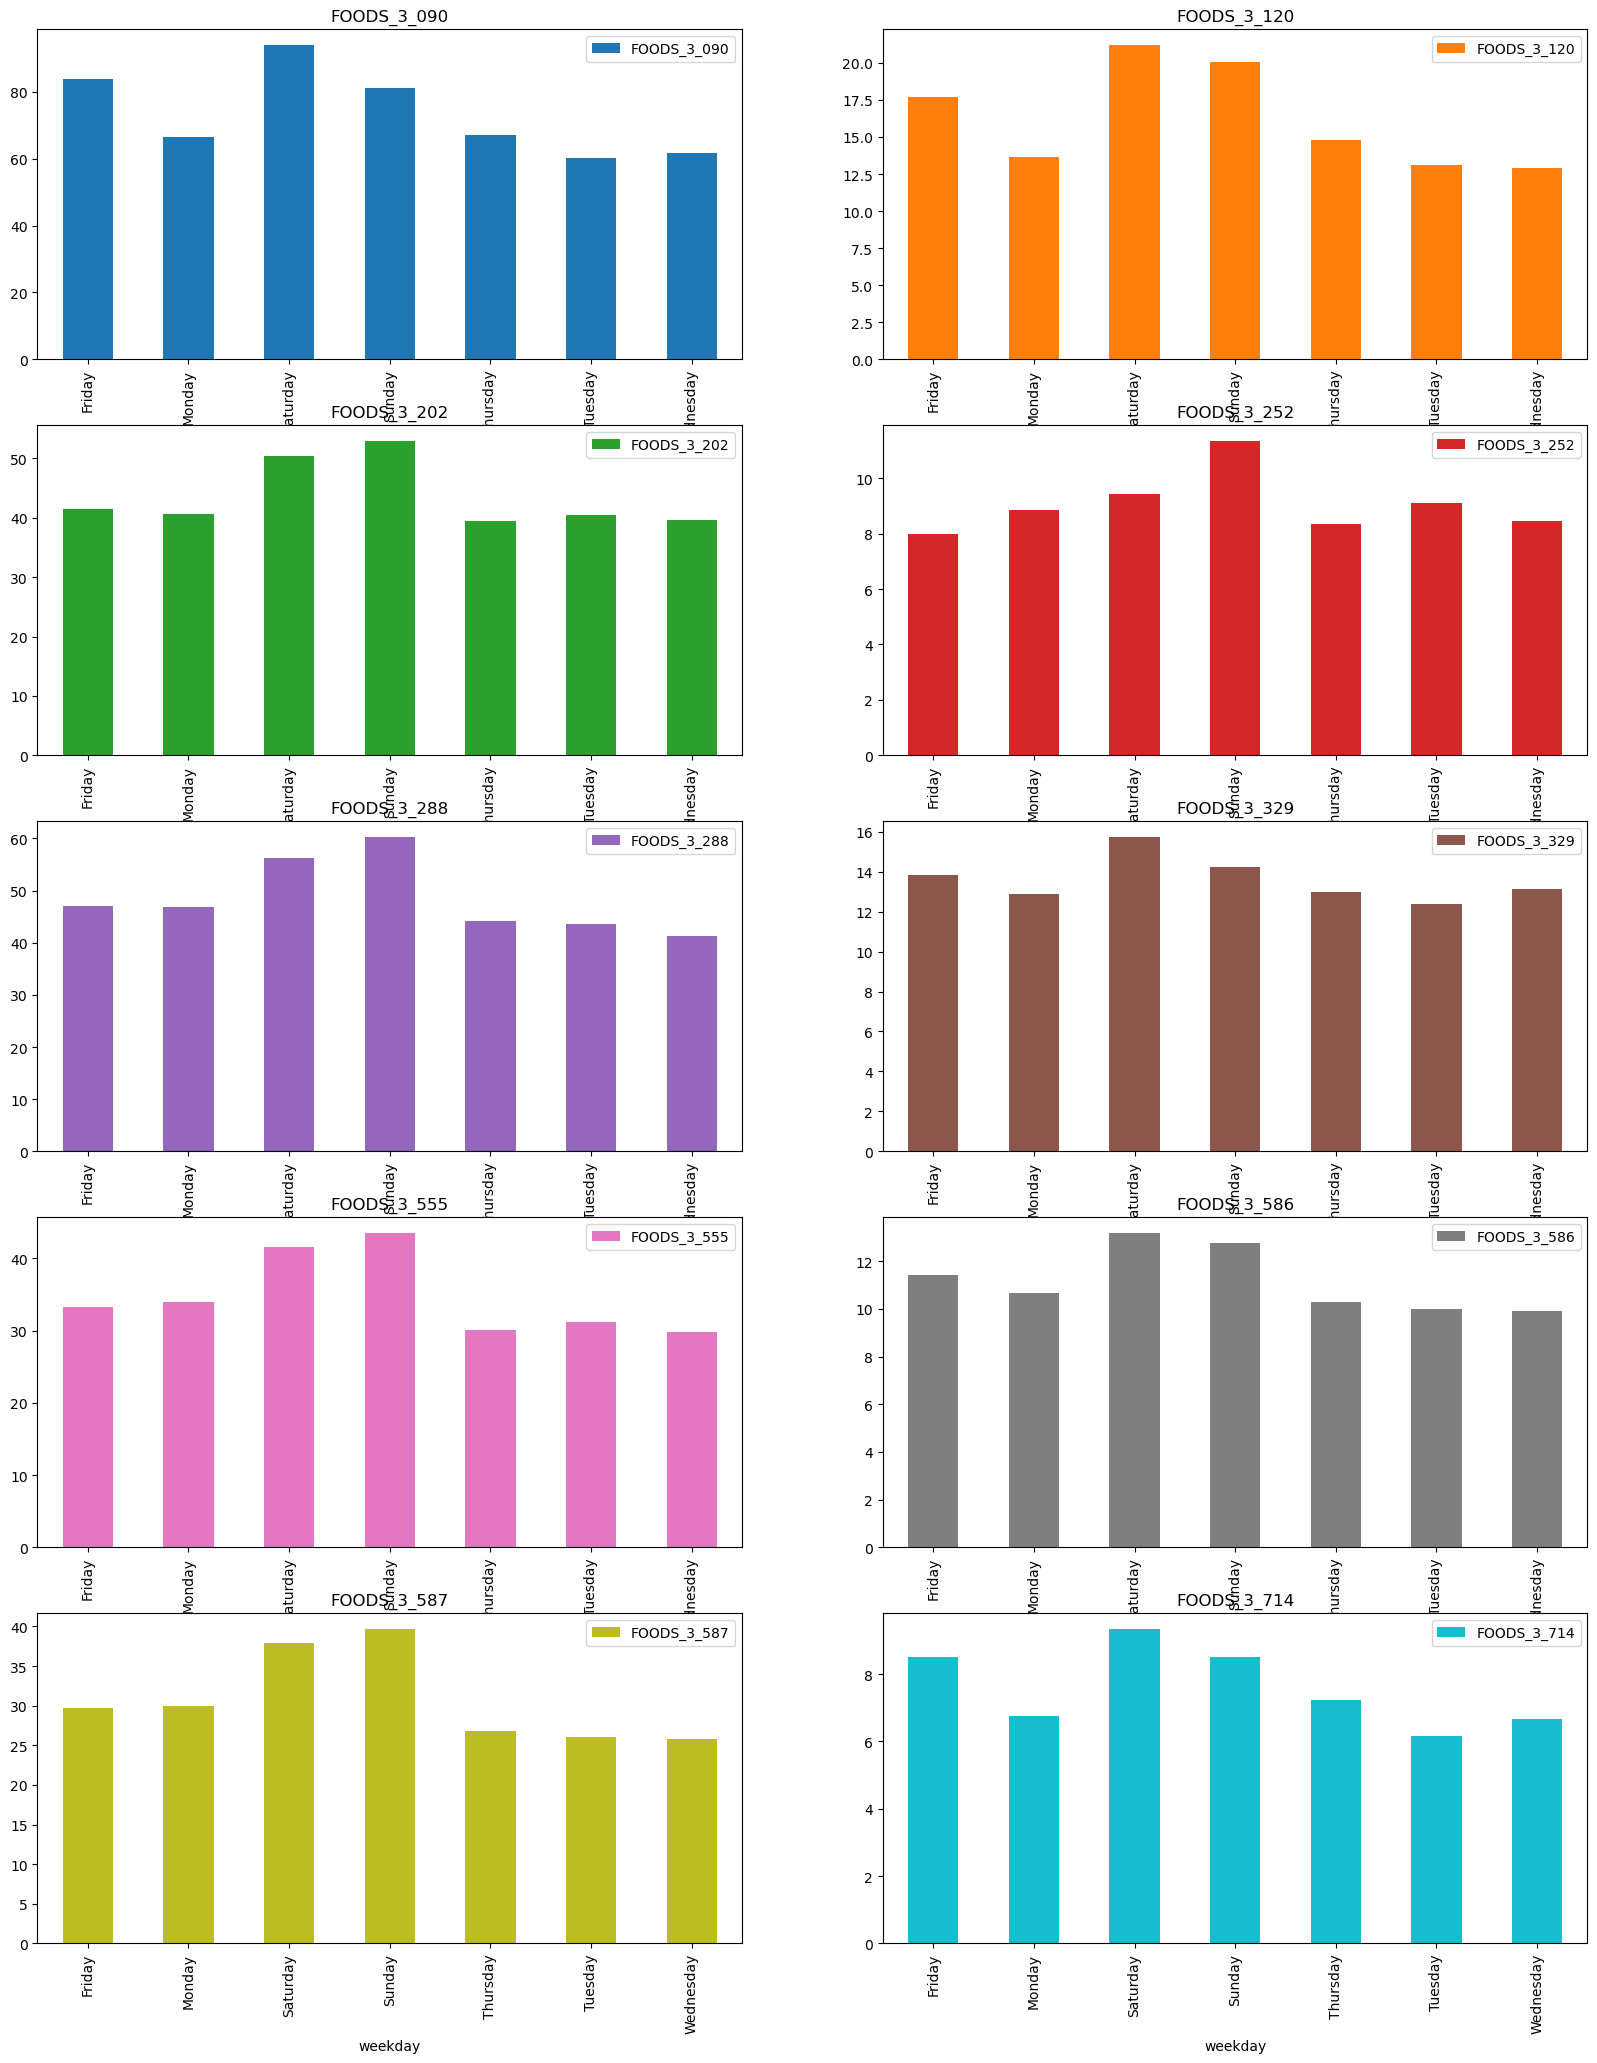

In [22]:
df.groupby(['weekday','item_id']).ventas.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));

#### Estacionalidad by event

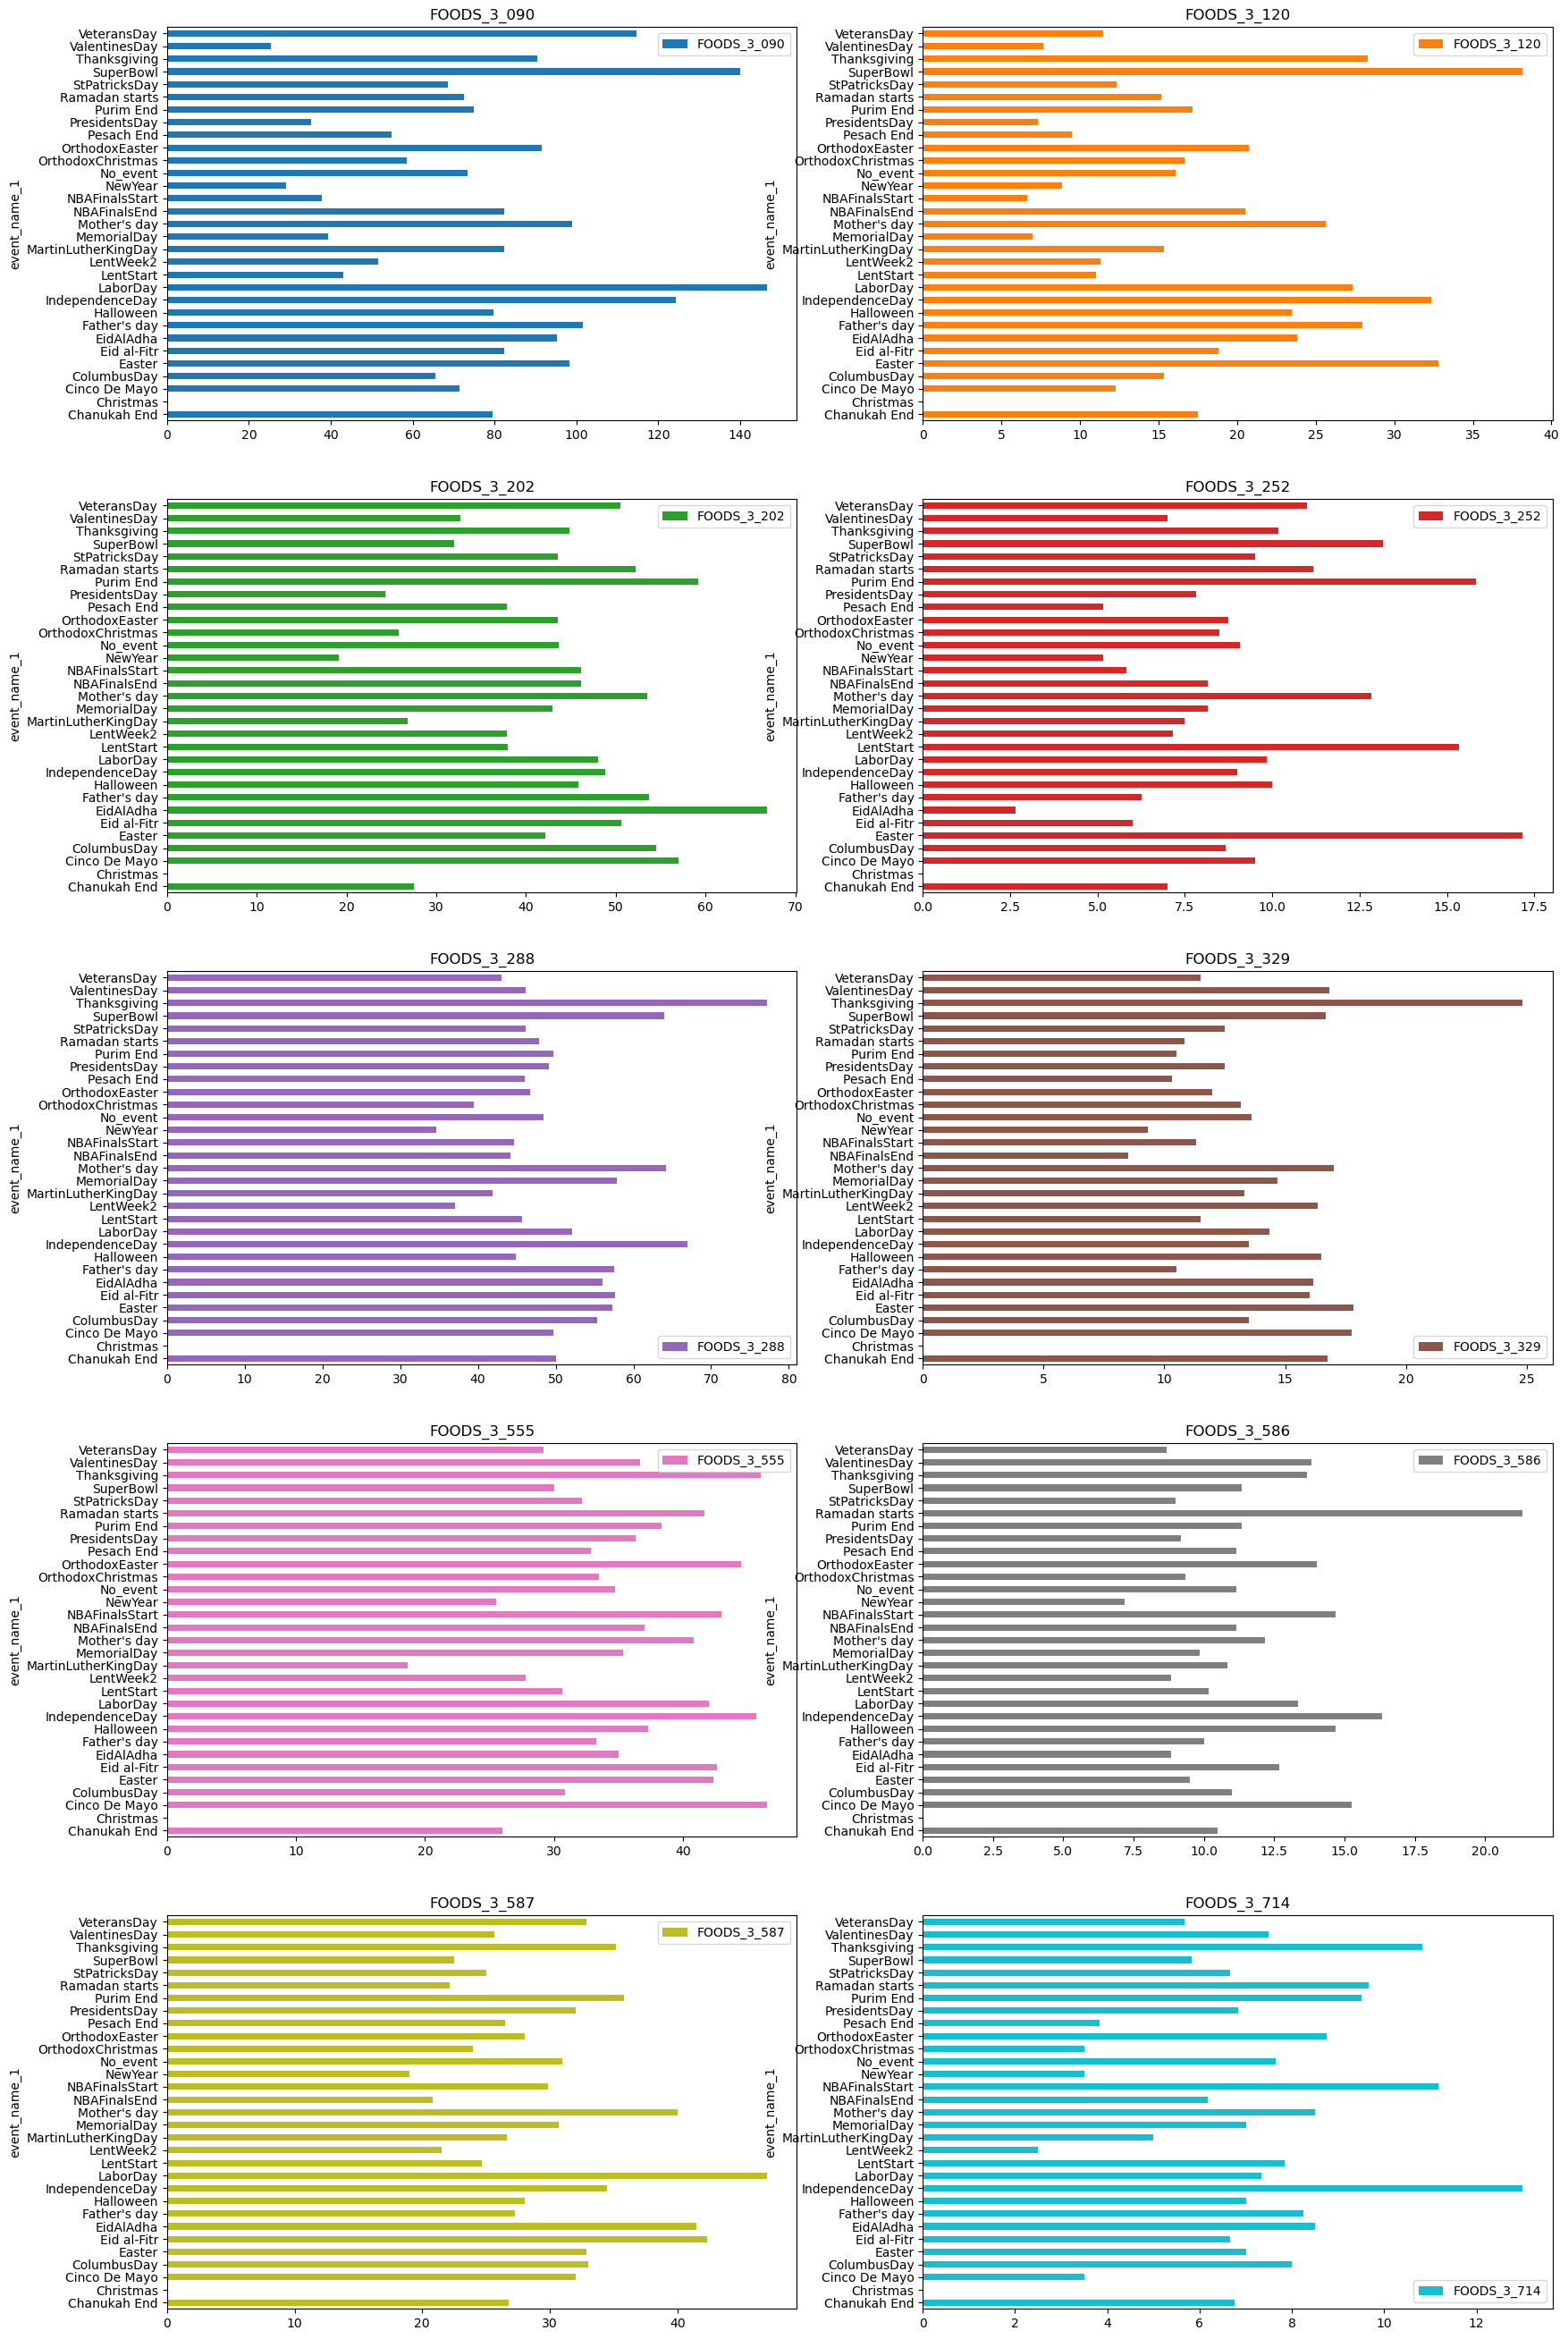

In [51]:
df.groupby(['event_name_1','item_id']).sales.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

#### Estacionalidad by event type

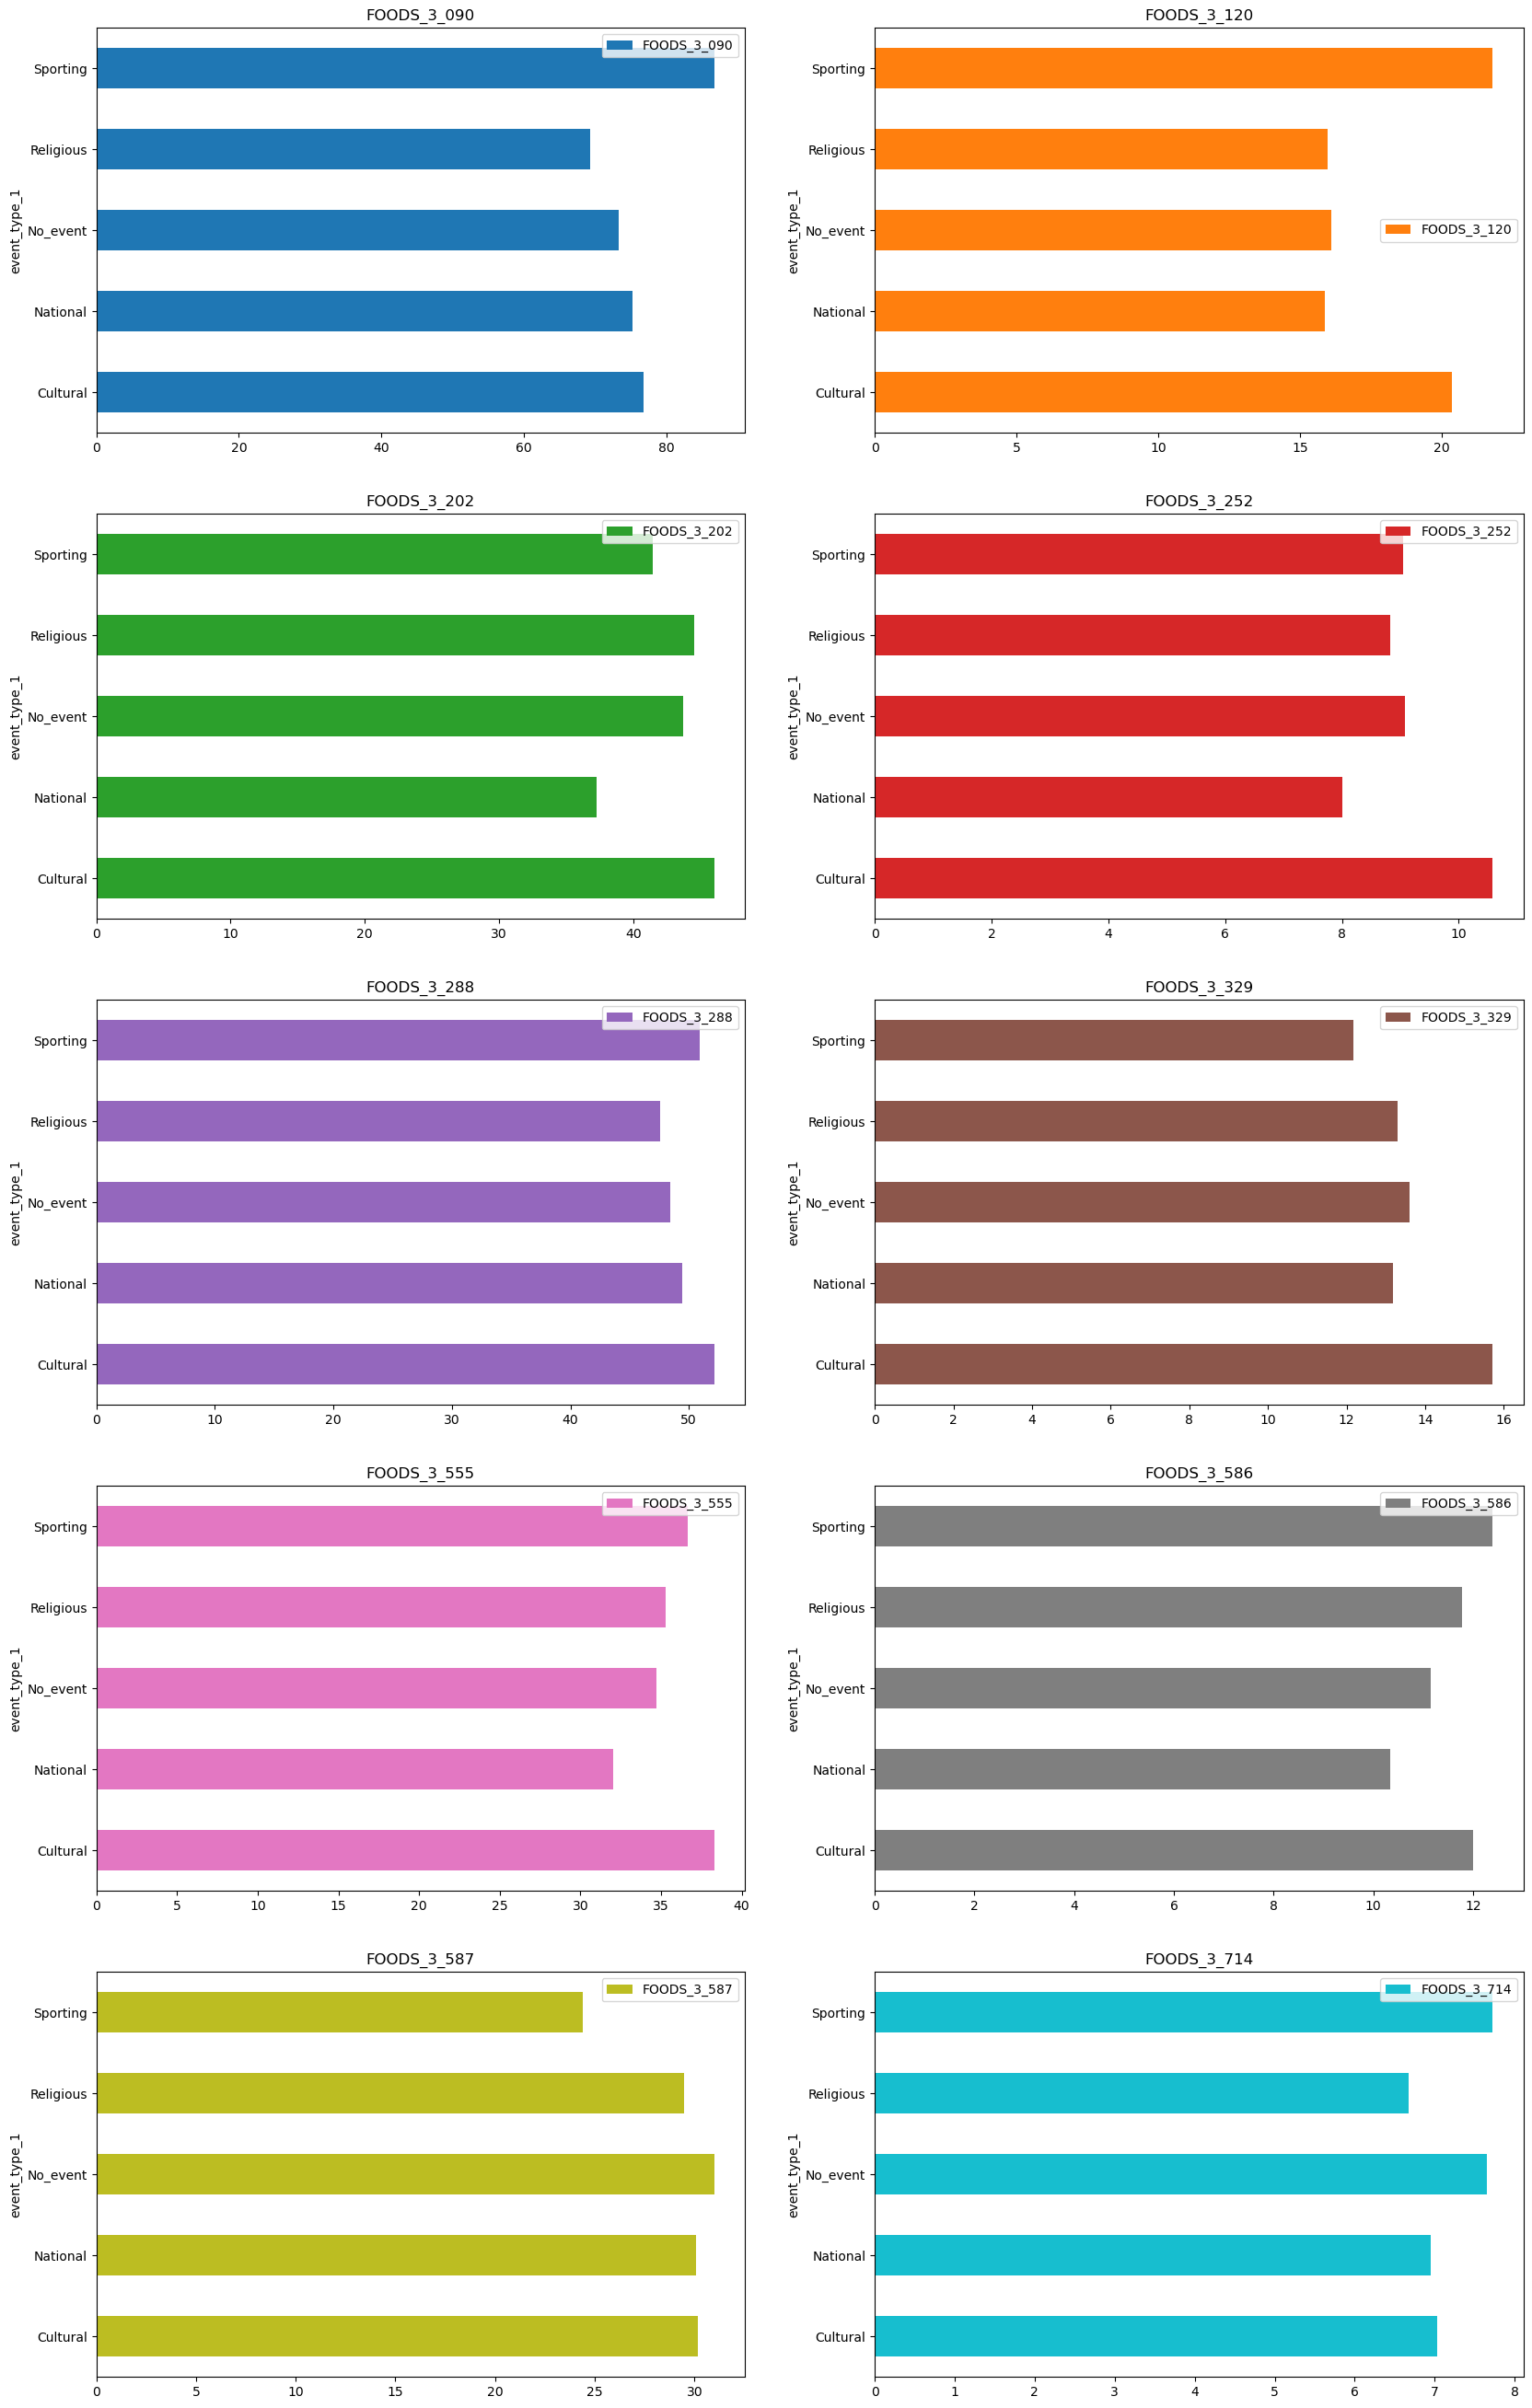

In [52]:
df.groupby(['event_type_1','item_id']).sales.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

Conclusions:

* All these variables do seem to affect which is good news

## SAVE DATASETS AFTER EDA

In [53]:
path_cat = path + '/02_Data/03_Work/' + 'cat_results_eda.pickle'
path_num = path + '/02_Data/03_Work/' + 'num_results_eda.pickle'

In [54]:
cat.to_pickle(path_cat)
num.to_pickle(path_num)